# Assignment 6


# Descriptive Statistics and Python Implementation

In [33]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [34]:
df=pd.read_csv("data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# Mean
$\cdot$ Mean is average of given Data

$\cdot$ In statistics, it is a measure of central tendency of a probability distribution along median and mode. It is also referred to as an expected value.

We can compute mean using given formula

$\mu $  =  $( \frac{1}{n} \sum_{i=i}^{n} x_{i} )$

Here,
x=sum of all the observations
n=number of observations

In [35]:
#consider column "Mthly_HH_Income"
a=df["Mthly_HH_Income"]
np.mean(a)

41558.0

In [36]:
#We can also find mean of all columns using apply function
df.iloc[:,0:5].apply(np.mean)

Mthly_HH_Income       41558.00
Mthly_HH_Expense      18818.00
No_of_Fly_Members         4.06
Emi_or_Rent_Amt        3060.00
Annual_HH_Income     490019.04
dtype: float64

# Median

$\cdot$ Median, in statistics, is the middle value of the given list of data, when arranged in an order

$\cdot$ The median of a set of data is the middlemost number or center value in the set. The median is also the number that is halfway into the set.

"Median is robust from outlier whereas mean can be impacted because of an outlier"

$\cdot$ Formula

When n is odd 

Median = $\frac{n+1}{2}^{th}term $

When n is even 

$\frac{(\frac{n}{2})^{th}term+(\frac{n}{2}+1)^{th}term}{2} $

In [37]:
len(df['Mthly_HH_Income']) #as you can se it is even

50

In [38]:
#Without using library function
def m(df):
    sortedd=sorted(df)
    length=len(df)
    if length%2==0:
        n=int(length//2)
        n1=(length//2)-1
        median=((sortedd[n]+sortedd[n1])//2)
    else:
        median=sortedd[length//2]
    return float(median)

In [39]:
m(df['Mthly_HH_Income'])

35000.0

In [40]:
np.median(df['Mthly_HH_Income']) #using library function


35000.0

In [41]:
df.iloc[:,0:5].apply(np.median)

Mthly_HH_Income       35000.0
Mthly_HH_Expense      15500.0
No_of_Fly_Members         4.0
Emi_or_Rent_Amt           0.0
Annual_HH_Income     447420.0
dtype: float64

# Mode

It is most frequent

It is robust to outliers.

Mode are of three types

Unimodal - When there is only one mode in the data.

Bimodal - When there are two modes in the data.

Multimodal - When there are more than two modes in the data

In [42]:
def modee(df):
    d={}
    for i in range(len(df)):
        if df[i] in d:
            d[df[i]]+=1
        else:
            d[df[i]]=1
    for i in d:
        a,b=i+1,max(d.values())
        return a,b
        

In [43]:
modee(df['No_of_Fly_Members'])  #h

(4, 15)

# Variance
$\cdot\$ Variance tells you how data is spread around the mean

$\cdot$  It can be defined as "The average of the squared differences from the Mean"

$\cdot$ Used in Univariate analysis

$\sigma^{2}=\frac{1}{n}\sum_{i=1}^{n}(x_i-\mu_x)^{2} $


In [44]:
#Calculate variance 
def varr(df):
    summation=sum(df)
    n=len(df)
    mean=summation/n
    var_add=0
    for i in df:
        sum_var=(i-mean)**2
        var_add+=sum_var
    return var_add/n

In [45]:
varr(df["Mthly_HH_Income"]) 

667478836.0

In [46]:
#now by using library function
df.iloc[:,0:5].apply(np.var)

Mthly_HH_Income      6.674788e+08
Mthly_HH_Expense     1.432499e+08
No_of_Fly_Members    2.256400e+00
Emi_or_Rent_Amt      3.817640e+07
Annual_HH_Income     1.004372e+11
dtype: float64

# Standard Deviation

$\sigma=\sqrt{\frac{1}{n}\sum{i=1}^{n}(x{i}-\mu_{x})^{2}} $

$\cdot$ Standard Deviation is a measure of spread in Statistics. 

$\cdot$ It is used to quantify the measure of spread, variation of a set of data values. 

$\cdot$ "Standard deviation is more commonly used because it is more intuitive with respect to units of measurement"

In [47]:
#It is just square root of variance
df.iloc[:,0:5].apply(np.std)

Mthly_HH_Income       25835.611779
Mthly_HH_Expense      11968.704023
No_of_Fly_Members         1.502132
Emi_or_Rent_Amt        6178.705366
Annual_HH_Income     316918.265315
dtype: float64

# Covariance

$cov(x,y)=\frac{1}{n}\sum_{i=1}^{n}(x_i-\mu_{x})(y_i-\mu_{y}) $

$\mu_x$ is expected value(mean) of random variable of X

$\mu_y$ is expected value(mean) of random variable of y

n is number of items in Data set

"It is used for linear Relationship"

Positive covariance: Indicates that two variables tend to move in the same direction.

Negative covariance: Reveals that two variables tend to move in inverse directions.

In [48]:
np.cov(df['Mthly_HH_Expense'],df['Annual_HH_Income'])

array([[1.46173343e+08, 2.28832990e+09],
       [2.28832990e+09, 1.02486925e+11]])

$C = \left( \begin{array}{ccc}  \sigma(x, x) & \sigma(x, y) \\  \sigma(y, x) & \sigma(y, y) \end{array} \right)$

# Correlation
$\cdot$ Correlation is a measure used to represent how strongly two random variables are related to each other.

$\cdot$ Correlation refers to the scaled form of covariance.

$\cdot$ Correlation ranges between -1 and +1

$\rho{x,y}=\frac{cov(x,y)}{\sigma{x}*\sigma{y}}$

Positive Correlation

A positive correlation—when the correlation coefficient is greater than 0—signifies that both variables move in the same direction

Negative Correlation

A negative (inverse) correlation occurs when the correlation coefficient is less than 0.

No Correalation

When $\rho$=0

In [49]:
#using numpy builtin function to find correation
np.corrcoef(df['Mthly_HH_Expense'],df['Annual_HH_Income'])


array([[1.        , 0.59122163],
       [0.59122163, 1.        ]])

The values on the main diagonal of the correlation matrix (upper left and lower right) are equal to 1. The upper left value corresponds to the correlation coefficient for x and x, while the lower right value is the correlation coefficient for y and y. They are always equal to 1.

However, what you usually need are the lower left and upper right values of the correlation matrix. These values are equal and both represent the Pearson correlation coefficient for x and y. In this case, it’s approximately 0.59.

In [50]:
#We can also find correltaion of whole data set
df.corr()


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


# Normal Distribution

The normal distribution is the most important probability distribution in statistics because it fits many natural phenomena. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution. It is also known as the Gaussian distribution and the bell curve.

Properties:-
 
1.It is symmetrical (mirror image)

2.The mean, median, and mode are equal

  The middle point of a normal distribution is the point with the maximum frequency, which means that it possesses the most      observations of the variable. The midpoint is also the point where these three measures fall. The measures are usually equal in a perfectly (normal) distribution.
  
3.Empirical rule

   The Empirical Rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations of the mean.
Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean.

The general formula for the probability density function of the normal distribution is

$f(x,\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}} $


f(x)	=	probability density function

$\sigma$	=	standard deviation

$\mu$	=	mean

$Score\sim N(\mu,\sigma^{2})$

<img src="normal-curve.jpg">

# Skewness

If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.



# Left and Right Skewed Distribution
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

<img src="left_right.jpg">

# Effect on mean, median and mode due to skewness

To summarize, generally if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode. 

mean<median<mode

If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.

mode<median<mean

# Kurtosis¶
Kurtosis tells the height and sharpness of the central peak, relative to standard bell curve

In Normal Distribution

Skewness = 0

Kurtosis = 0

# Q-Q Plot (Quartile-Quartile Plot)

It is a way to test the normality of distribution

A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. That is, the 0.3 (or 30%) quantile is the point at which 30% percent of the data fall below and 70% fall above that value.

A 45-degree reference line is also plotted. If the two sets come from a population with the same distribution, the points should fall approximately along this reference line. The greater the departure from this reference line, the greater the evidence for the conclusion that the two data sets have come from populations with different distributions.


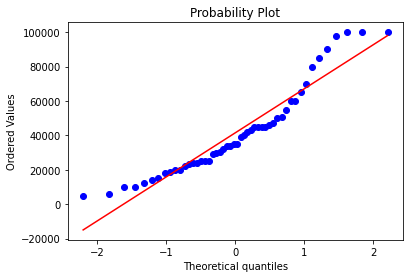

In [51]:
stats.probplot(df['Mthly_HH_Income'], dist="norm",plot=plt)
plt.show()
#Here Data is not normally distributed because most of points doesnot lies in 45 degree line


C:\Users\akshat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


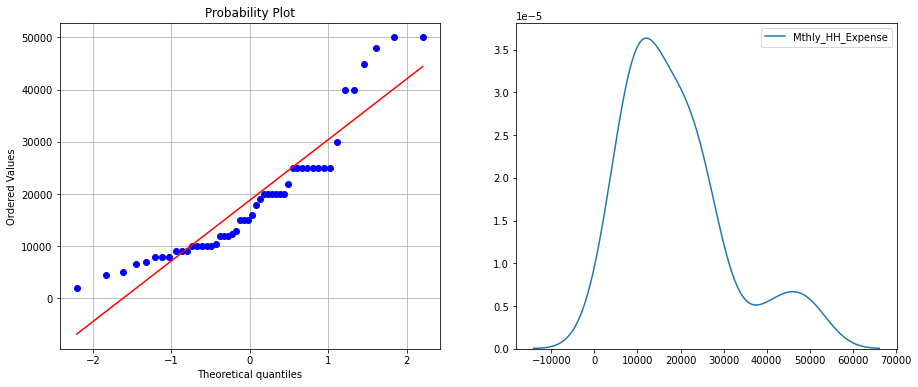

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
stats.probplot(df['Mthly_HH_Expense'],dist='norm',plot=plt)
plt.grid()

plt.subplot(1,2,2)
sns.kdeplot(df['Mthly_HH_Expense'])
plt.show()

# Box-Cox Transformation
It is used to transform the data into normal distribution

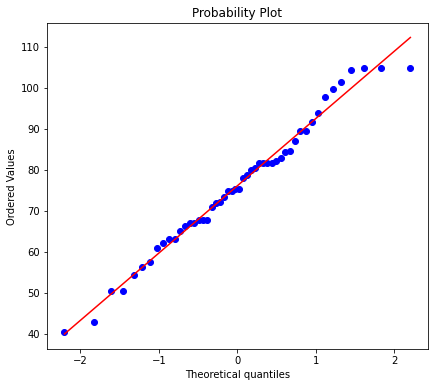

In [62]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
xt, _ = stats.boxcox(df['Mthly_HH_Income'])
prob = stats.probplot(xt, dist=stats.norm, plot=plt)
plt.show()

